In [1]:
from umap import UMAP
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score, accuracy_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import random_projection
from sklearn.pipeline import Pipeline
import umap

# Load the dataset
wine_dataset = load_wine()

# Access the feature names
feature_names = wine_dataset.feature_names

# Access the data and target
data = wine_dataset.data
target = wine_dataset.target

# Convert data and target to a Pandas DataFrame
wine_df = pd.DataFrame(data, columns=feature_names)
wine_df['target'] = target

np.random.seed(42)

print(wine_df.info())
print(wine_df.shape)

# Normalize features for better performance
min_max_scaler = MinMaxScaler()
wineX = min_max_scaler.fit_transform(wine_df.drop("target", axis=1).values)
wineY = wine_df["target"].values

# Perform a stratified split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(wineX, wineY, test_size=0.2, stratify=wineY, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


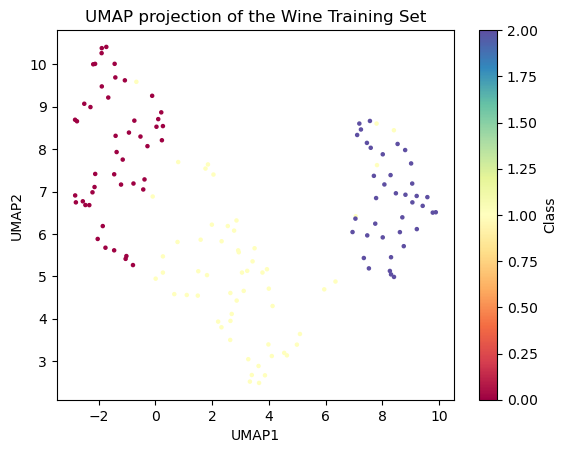

In [2]:
# UMAP transformation
umap_instance = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
X_train_umap = umap_instance.fit_transform(X_train)

# Plot UMAP result, color by class
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap='Spectral', s=5)
plt.title('UMAP projection of the Wine Training Set', fontsize=12)
plt.colorbar(label='Class')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting

Best parameters found:  {'classifier__max_depth': None, 'umap__min_dist': 0.1, 'umap__n_neighbors': 30}
Best cross-validation score: 0.96


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


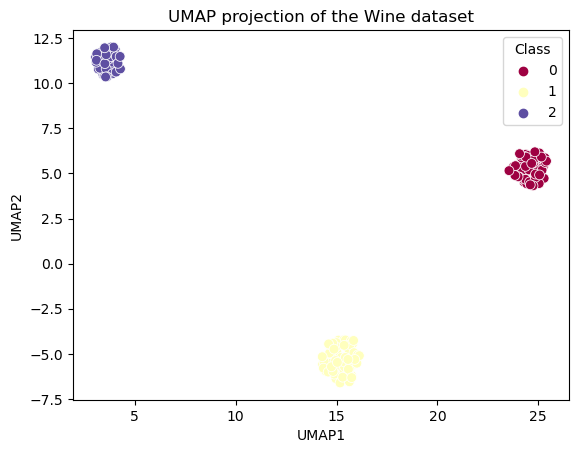

In [16]:
from umap import UMAP
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
wine_dataset = load_wine()
feature_names = wine_dataset.feature_names
data = wine_dataset.data
target = wine_dataset.target

# Convert to a Pandas DataFrame
wine_df = pd.DataFrame(data, columns=feature_names)
wine_df['target'] = target

# Output dataset info and shape
print(wine_df.info())
print(wine_df.shape)

# Normalize the feature data
min_max_scaler = MinMaxScaler()
wineX = min_max_scaler.fit_transform(wine_df.drop("target", axis=1))
wineY = wine_df["target"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(wineX, wineY, test_size=0.2, stratify=wineY, random_state=42)

# Create a Pipeline for scaling, dimensionality reduction with UMAP and classification with Decision Tree
pipeline = Pipeline([
    ('umap', UMAP(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid for GridSearch
param_grid = {
    'umap__n_neighbors': [5, 15, 30],
    'umap__min_dist': [0.1, 0.5, 0.99],
    'classifier__max_depth': [None, 5, 10, 15]
}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score achieved
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Get the best UMAP transformation and classifier from the grid search
best_umap = grid_search.best_estimator_.named_steps['umap']
best_classifier = grid_search.best_estimator_.named_steps['classifier']

# Transform the training dataset using the best UMAP parameters
X_train_umap = best_umap.transform(X_train)

# Visualize the UMAP projection
sns.scatterplot(x=X_train_umap[:, 0], y=X_train_umap[:, 1], hue=y_train, palette='Spectral', s=50, edgecolor='w')
plt.title('UMAP projection of the Wine dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Class')
plt.show()

In [3]:
umap_instance = UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=42)
X_train_umap = umap_instance.fit_transform(X_train)

# 1. Euclidean Distances Heatmap
plot_distance_heatmap(X_train, X_train_umap)

# 2. Pairplot with UMAP components
umap_pairplot(X_train_umap, y_train)

# 3. Decision Boundary Visualization
# Train the classifier with the best parameters
dt_classifier = DecisionTreeClassifier(max_depth=None, random_state=42)
dt_classifier.fit(X_train_umap, y_train)
# Now plot the decision boundaries
plot_decision_boundaries(X_train_umap, y_train, dt_classifier)

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


NameError: name 'plot_distance_heatmap' is not defined

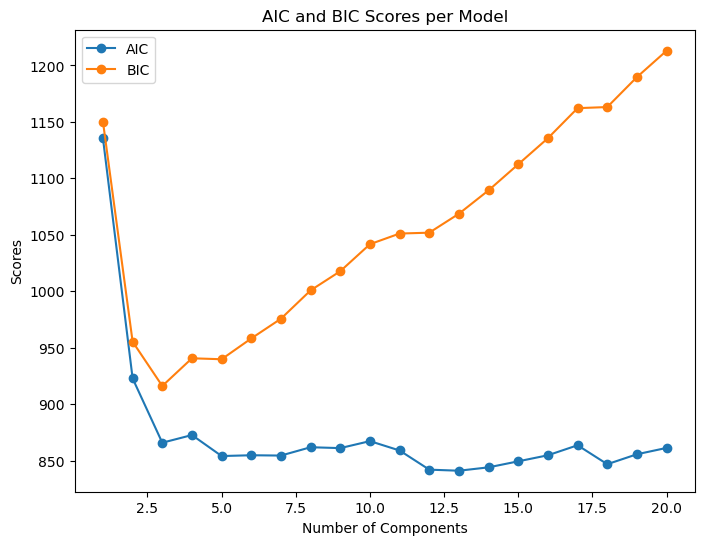

Optimal number of components by BIC: 3
AIC for optimal model: 865.8761830030746
BIC for optimal model: 916.1252429822961
Silhouette Score for 3 clusters: 0.670


In [14]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming you have already your data 'X_train_umap' ready
# Define the range of components to try
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_train_umap) for n in n_components]

# Calculate the BIC and AIC
bic = [m.bic(X_train_umap) for m in models]
aic = [m.aic(X_train_umap) for m in models]

# Find the model with the lowest BIC and its corresponding number of components
lowest_bic = np.min(bic)
best_bic_model = models[bic.index(lowest_bic)]
n_components_bic = n_components[bic.index(lowest_bic)]

# Plot the AIC and BIC scores
plt.figure(figsize=(8, 6))
plt.plot(n_components, aic, label='AIC', marker='o')
plt.plot(n_components, bic, label='BIC', marker='o')
plt.title('AIC and BIC Scores per Model')
plt.xlabel('Number of Components')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Print the optimal number of clusters according to BIC and AIC for that model
print(f"Optimal number of components by BIC: {n_components_bic}")
print(f"AIC for optimal model: {best_bic_model.aic(X_train_umap)}")
print(f"BIC for optimal model: {lowest_bic}")

# Now perform the Gaussian Mixture using the optimal number of components found by BIC
optimal_gmm = GaussianMixture(n_components=n_components_bic, covariance_type='full', random_state=0)
optimal_gmm.fit(X_train_umap)
clusters = optimal_gmm.predict(X_train_umap)

# Calculate silhouette score for the optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_train_umap, clusters)
print(f'Silhouette Score for {n_components_bic} clusters: {silhouette_avg:.3f}')

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import davies_bouldin_score

Optimal number of components by BIC: 3
Average Silhouette Score: 0.6708992719650269
Homogeneity Score: 0.8406300334665846
Completeness Score: 0.8327680787311951
Davies-Bouldin Score: 0.4518142677632266
Adjusted Rand Index: 0.8529815571723666


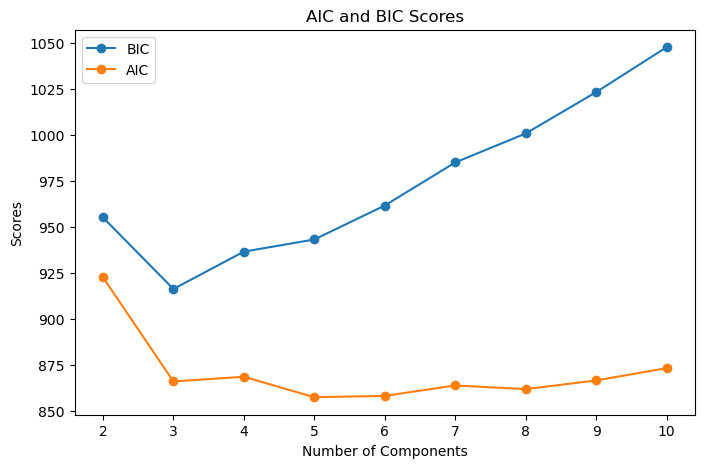

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


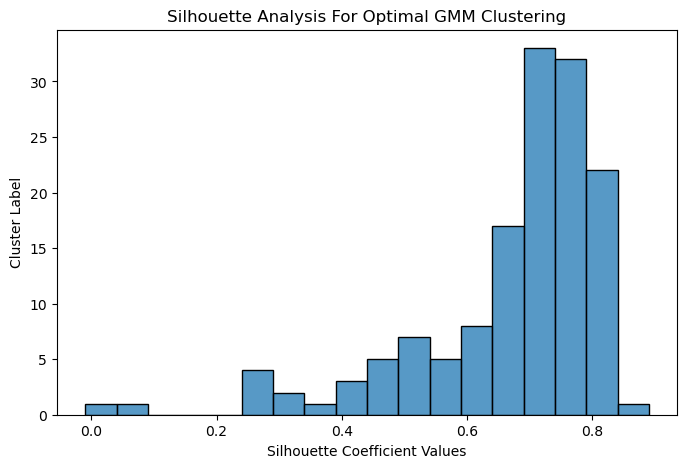

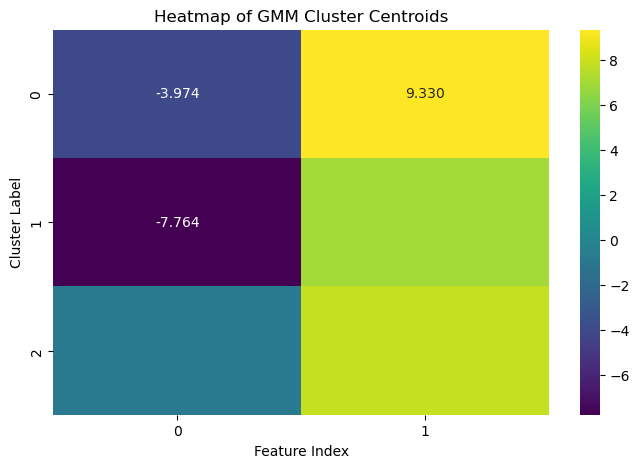

In [16]:
# Perform Gaussian Mixture Model clustering
n_components_range = range(2, 11)  # Adjust the range based on your specific needs
lowest_bic = np.infty
bic = []
aic = []
n_components_bic = None

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X_train_umap)
    bic.append(gmm.bic(X_train_umap))
    aic.append(gmm.aic(X_train_umap))
    
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        n_components_bic = n_components

optimal_gmm = GaussianMixture(n_components=n_components_bic, covariance_type='full', random_state=42)
optimal_gmm.fit(X_train_umap)
clusters = optimal_gmm.predict(X_train_umap)

# Calculate metrics
silhouette_avg = silhouette_score(X_train_umap, clusters)
homogeneity = homogeneity_score(y_train, clusters)
completeness = completeness_score(y_train, clusters)
davies_bouldin = davies_bouldin_score(X_train_umap, clusters)
adjusted_rand = adjusted_rand_score(y_train, clusters)

print(f"Optimal number of components by BIC: {n_components_bic}")
print(f"Average Silhouette Score: {silhouette_avg}")
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"Davies-Bouldin Score: {davies_bouldin}")
print(f"Adjusted Rand Index: {adjusted_rand}")

# Plotting AIC and BIC
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.plot(n_components_range, aic, label='AIC', marker='o')
plt.legend(loc='best')
plt.xlabel('Number of Components')
plt.ylabel('Scores')
plt.title('AIC and BIC Scores')
plt.show()

# Silhouette Plot
plt.figure(figsize=(8, 5))
sample_silhouette_values = silhouette_samples(X_train_umap, clusters)
sns.histplot(sample_silhouette_values, binwidth=0.05)
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.title('Silhouette Analysis For Optimal GMM Clustering')
plt.show()

# Heatmap of the cluster centroids
plt.figure(figsize=(8, 5))
sns.heatmap(optimal_gmm.means_, cmap="viridis", annot=True, fmt=".3f")
plt.title('Heatmap of GMM Cluster Centroids')
plt.xlabel('Feature Index')
plt.ylabel('Cluster Label')
plt.show()

In [17]:
# Find the optimal number of clusters based on silhouette score
highest_silhouette = -1
n_components_silhouette = None

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X_train_umap)
    labels = gmm.predict(X_train_umap)
    silhouette_avg = silhouette_score(X_train_umap, labels)
    
    if silhouette_avg > highest_silhouette:
        highest_silhouette = silhouette_avg
        n_components_silhouette = n_components

print(f"Optimal number of components by Silhouette Score: {n_components_silhouette}")
print(f"Highest Silhouette Score: {highest_silhouette}")

Optimal number of components by Silhouette Score: 3
Highest Silhouette Score: 0.6708992719650269


In [18]:
# Find the optimal number of clusters based on AIC
lowest_aic = min(aic)
optimal_n_components_aic = aic.index(lowest_aic) + 2  # +2 because range starts at 2

print(f"Optimal number of components by AIC: {optimal_n_components_aic}")
print(f"Lowest AIC Score: {lowest_aic}")

Optimal number of components by AIC: 5
Lowest AIC Score: 857.6522639447184


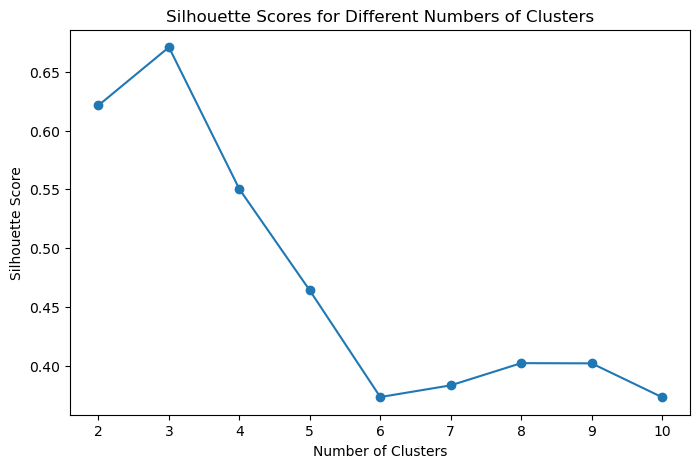

In [19]:
# Silhouette analysis to determine the optimal number of clusters for GMM
silhouette_scores = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X_train_umap)
    labels = gmm.predict(X_train_umap)
    silhouette_avg = silhouette_score(X_train_umap, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, silhouette_scores, marker='o')
plt.xticks(n_components_range)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

In [20]:
#K-Means

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

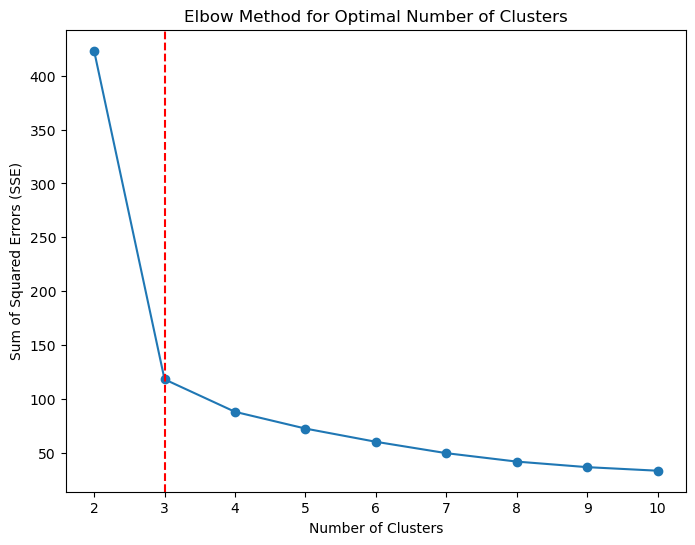

Optimal number of clusters by elbow method: 3
Silhouette Score for optimal clusters: 0.67


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X_train_umap is already defined and contains the UMAP reduced data.

# Range of clusters to evaluate
n_clusters_range = range(2, 11)
sse = []  # List to store SSE values for each n_clusters

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_umap)
    sse.append(kmeans.inertia_)

# Determine the elbow point
differences = [-sse[i] + sse[i + 1] for i in range(len(sse) - 1)]  # Get the differences between consecutive SSEs
threshold_fraction = 0.1  # for example, 10% of the first difference
threshold = threshold_fraction * abs(differences[0])
elbow_index = next(i for i, diff in enumerate(differences) if abs(diff) < threshold)
optimal_n_clusters = elbow_index + 2

# Fit K-Means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans_optimal.fit(X_train_umap)

# Calculate silhouette score for the optimal number of clusters
labels_optimal = kmeans_optimal.labels_
silhouette_avg_optimal = silhouette_score(X_train_umap, labels_optimal)

# Plot SSE for each n_clusters
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(n_clusters_range)
plt.axvline(x=optimal_n_clusters, color='red', linestyle='--')
plt.show()

print(f"Optimal number of clusters by elbow method: {optimal_n_clusters}")
print(f"Silhouette Score for optimal clusters: {silhouette_avg_optimal:.2f}")

In [8]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, mutual_info_score

# Assuming labels_optimal is the cluster labels from the optimal KMeans clustering
# and y_train is the true labels

calinski_harabasz = calinski_harabasz_score(X_train_umap, labels_optimal)
davies_bouldin = davies_bouldin_score(X_train_umap, labels_optimal)
adjusted_rand = adjusted_rand_score(y_train, labels_optimal)
mutual_info = mutual_info_score(y_train, labels_optimal)

print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print(f"Adjusted Rand Index: {adjusted_rand:.2f}")
print(f"Mutual Information: {mutual_info:.2f}")

Calinski-Harabasz Index: 735.20
Davies-Bouldin Index: 0.45
Adjusted Rand Index: 0.85
Mutual Information: 0.91


For n_clusters = 3 The average silhouette_score is : 0.6708993


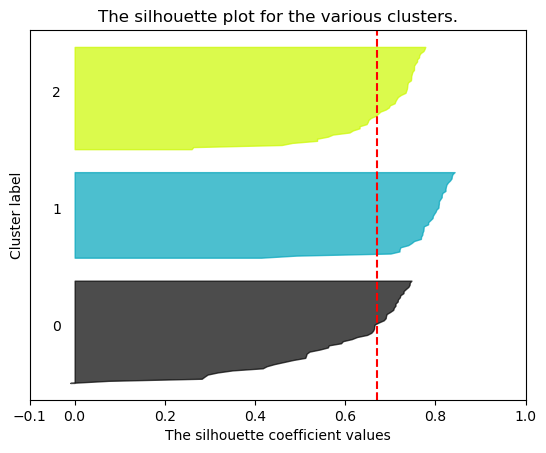

In [9]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def silhouette_plot(X, y, clusterer, point_labels=None):
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", clusterer.n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(clusterer.n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / clusterer.n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

silhouette_plot(X_train_umap, y_train, kmeans_optimal)

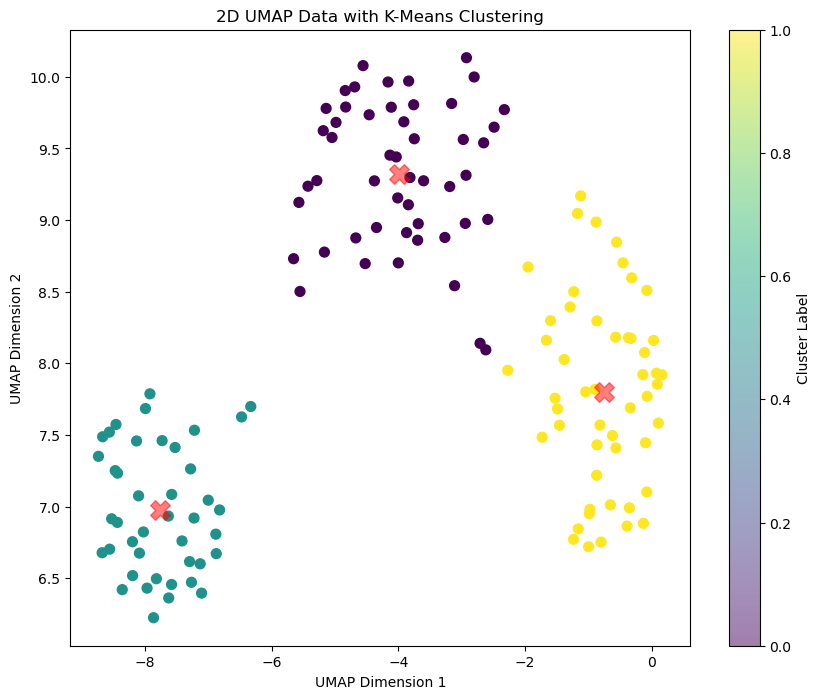

In [14]:
# Assuming X_train_umap has two dimensions because of UMAP reduction

# Scatter plot of the UMAP reduced data colored by cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=labels_optimal, cmap='viridis', s=50)
plt.title('2D UMAP Data with K-Means Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Overlay the cluster centers
centers = kmeans_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')

plt.colorbar(label='Cluster Label')
plt.show()